# OOP in Practice

## Abstract class
Sometimes, it can be desirable to define a class that only serves as a base class and are not meant to be instantiated.
- we call these classes abstract classes

In [79]:
class Animal:
    def reproduce(self):
        pass

class Whale(Animal):
    def reproduce(self):
        return Whale()

willy = Animal()
print(willy.reproduce())

None


In [80]:
from abc import ABC, abstractmethod

class Animal(ABC):
    @abstractmethod
    def reproduce(self):
        pass

class Whale(Animal):
    def reproduce(self):
        return Whale()

willy = Animal()
print(willy.reproduce())

TypeError: Can't instantiate abstract class Animal with abstract method reproduce

In [ ]:
from abc import ABC, abstractmethod

class Animal(ABC):
    @abstractmethod
    def reproduce(self):
        pass

class Whale(Animal):
    pass

willy = Whale()
print(willy.reproduce())

TypeError: Can't instantiate abstract class Whale with abstract method reproduce

Abstract methods must be overwritten by methods from a subclass:t be overwritten by methods from a subclass:

In [ ]:
class Animal(ABC):
    @abstractmethod
    def reproduce(self):
        pass
        
    #@abstractmethod
    def walking(self):
        return 'walks'

class Whale(Animal):
    def reproduce(self):
        return Whale()

class Dog(Animal):
    def bark(self):
        print('barking')
        return 'Bla'

    # def reproduce(self):
    #     return Dog()

    def walking(self):
         return super().walking()

willy = Dog()
print(willy.bark())
willy.walking()

TypeError: Can't instantiate abstract class Dog with abstract method reproduce

Singleton Pattern

- A singleton pattern is a class where only one instance is ever created
- can be used instead of global variables
- This means that they act as global scope manager

Example:
- unique school
- has teachers and students

```
school1 = School(1)
school2 = School(2000)
print(id(school1) == id(school2))  //TRUE

In [ ]:
class School:

    def __init__(self, population):
        self.population = population
        print(self.population, 'in __init__')

    def __new__(cls, population):
        print(population, 'I AM NEW!!')



school1 = School(1)

school1.population

1 I AM NEW!!


AttributeError: 'NoneType' object has no attribute 'population'

In [ ]:
instance = None

print(not None) # because None is falsy
print(None == None)

True
True


In [ ]:
class School:
    class __School:
        def __init__(self, population) -> None:
            self.population = population

        def __str__(self):
            return f"School({self.population})"

        def add_popu(self, population):
            self.population += population

    __instance = None

    def __new__(cls, population):
        # if not cls.__instance:
    
        if cls.__instance == None:
            cls.__instance = cls.__School(population)
        print('INSTANCE',cls.__instance)
        return cls.__instance

school1 = School(1)
# print(id(school1))
school2 = School(2000)
# print(id(school2))

# print(school1)
# print(school2)

# school1.add_popu(100)
# school2.population

INSTANCE School(1)
INSTANCE School(1)


## @Singleton Decorator

## Recap Decorator
- a decorator takes a *func* as an argument; *func* is a free variable, which are used in closures

In [ ]:
def singleton(class_):
    instances = {}
    def inner(*args, **kwargs):
        if class_ not in instances:
            instances[class_] = class_(*args, **kwargs)
            print(instances)
        return instances[class_]
    return inner

@singleton
class FirstClass:
    def __init__(self, m):
        self.m = m

    def get_m(self):
        return self.m

# FirstClass = singleton(FirstClass)

# print(FirstClass)

a = FirstClass(1)   # class_(*args, **kwargs)
b = FirstClass(23)

# print(a)
# print(id(a), id(b))

@singleton
class SecondClass:
    def __init__(self):
        self.val = 0

d = SecondClass()

## Class Decorators

- an instance of an class can behave like a function by call the __ call__ method
- () invocation operator
__ call__:

In [ ]:
def power_of_2(func):
    def inner(*args, **kwargs):
        result = func(*args, **kwargs)
        return result ** 2
    return inner

In [ ]:
class PowerOf2:
    def __init__(self, func):
        self._func = func

    def __call__(self, *args, **kwargs):
        return self._func(*args, **kwargs) ** 2

@PowerOf2
@PowerOf2
def add(a,b):
    return a + b

add(1,1)

## Version 3 of the Singleton Pattern

In [ ]:
#Version 2
def singleton(class_):
    instances = {}
    def inner(*args, **kwargs):
        if class_ not in instances:
            instances[class_] = class_(*args, **kwargs)
            print(instances)
        return instances[class_]
    return inner

In [ ]:
class Singleton:
    _instances = {}

    def __init__(self, class_):
        self._class = class_      # Singelton(CLASSNAME)

    def __call__(self, *args, **kwargs): # INSTANCE ()
        if self._class not in self._instances:
            self._instances[self._class] = self._class(*args, **kwargs)
        return self._instances[self._class]


# @Singleton
class FirstClass:
    def __init__(self, m) -> None:
        self.m = m

FirstClass = Singleton(FirstClass) # here the __init__ of the Singleton class is triggered

a = FirstClass(1) # here the __call__ is triggered 
#and only if no instance of FirstClass has been created a new FirstClass instance is created and returned
# the creation of the FirstClass Instance has triggered __init_ of FirstClass
b = FirstClass(23)

@Singleton
class SecondClass:
    def __init__(self) -> None:
        self.m = 1

c = SecondClass()
# print(id(a), id(b))
print(Singleton._instances)

## Factory Pattern


- a factory is a function that returns instances of different classes
- Factory Method allows to create an instance of a class

In [ ]:
class FrenchLocalizer:

    def __init__(self):
        self.translation = {"car": "voiture", "bike": "bicyclette",
                             "cycle":"cyclette"}
    def localize(self, msg):
        return self.translation.get(msg, msg)

class SpanishLocalizer:

    def __init__(self):
        self.translation = {"car": "coche", "bike": "bicicleta",
                             "cycle":"ciclo"}
    def localize(self, msg):
        return self.translation.get(msg, msg)

class EnglishLocalizer:

    def localize(self, msg):
        return msg

f = FrenchLocalizer()
e = EnglishLocalizer()
s = SpanishLocalizer()

words = ['car', 'bicycle', 'cycle']

for word in words:
    print('*********')
    print(word)
    print('*********')
    print(f.localize(word))
    print(e.localize(word))
    print(s.localize(word))

In [ ]:
def factory(language="English"):
    localizer = {
        "French": FrenchLocalizer,
        "English": EnglishLocalizer,
        "Spanish": SpanishLocalizer
        
    }
    return localizer[language]()

f = factory('French')
e = factory()
s = factory('Spanish')

for word in words:
    print('*********')
    print(word)
    print('*********')
    print(f.localize(word))
    print(e.localize(word))
    print(s.localize(word))

## Version 2 of Singleton pattern

In [ ]:
def singleton(class_):
    instances = {}
    def inner(*args, **kwargs):
        if class_ not in instances:
            instances[class_] = class_(*args, **kwargs)
            print(instances)
        return instances[class_]
    return inner

@singleton
class FirstClass:
    def __init__(self, m):
        self.m = m

    def get_m(self):
        return self.m

# FirstClass = singleton(FirstClass)

# print(FirstClass)

a = FirstClass(1)   # class_(*args, **kwargs)
b = FirstClass(23)

# print(a)
# print(id(a), id(b))

@singleton
class SecondClass:
    def __init__(self):
        self.val = 0

d = SecondClass()

{<class '__main__.FirstClass'>: <__main__.FirstClass object at 0x7f2c383c6980>}
{<class '__main__.SecondClass'>: <__main__.SecondClass object at 0x7f2c383c6260>}


In [ ]:
def Inner(class_):
    print(class_(1))
    return class_(1) #returns an INSTANCE if class_

class FirstClass:
    def __init__(self, m):
        self.m = m

    def get_m(self):
        return self.m

Inner(FirstClass)

## Class Decorators

- an instance of an class can behave like a function by call the __ call__ method
- () invocation operator
__ call__:

In [ ]:
class Mimic:
    def __call__(self):
        return 'Hello World'

    def greetings(self):
        return 'Good morning'

mimic_instance = Mimic() 
mimic_instance.greetings()
mimic_instance()

'Hello World'

In [ ]:
def power_of_2(func):
    def inner(*args, **kwargs):
        result = func(*args, **kwargs)
        return result ** 2
    return inner

In [ ]:
class PowerOf2:
    def __init__(self, func):
        self._func = func

    def __call__(self, *args, **kwargs):
        return self._func(*args, **kwargs) ** 2

@PowerOf2
@PowerOf2
def add(a,b):
    return a + b

add(1,1)

16

## Version 3 of the Singleton Pattern

In [ ]:
#Version 2
def singleton(class_):
    instances = {}
    def inner(*args, **kwargs):
        if class_ not in instances:
            instances[class_] = class_(*args, **kwargs)
            print(instances)
        return instances[class_]
    return inner

In [ ]:
class Singleton:
    _instances = {}

    def __init__(self, class_):
        self._class = class_      # Singelton(CLASSNAME)

    def __call__(self, *args, **kwargs): # INSTANCE ()
        if self._class not in self._instances:
            self._instances[self._class] = self._class(*args, **kwargs)
        return self._instances[self._class]


# @Singleton
class FirstClass:
    def __init__(self, m) -> None:
        self.m = m

FirstClass = Singleton(FirstClass) # here the __init__ of the Singleton class is triggered

a = FirstClass(1) # here the __call__ is triggered 
#and only if no instance of FirstClass has been created a new FirstClass instance is created and returned
# the creation of the FirstClass Instance has triggered __init_ of FirstClass
b = FirstClass(23)

@Singleton
class SecondClass:
    def __init__(self) -> None:
        self.m = 1

c = SecondClass()
# print(id(a), id(b))
print(Singleton._instances)

{<class '__main__.FirstClass'>: <__main__.FirstClass object at 0x7f2c39aea110>, <class '__main__.SecondClass'>: <__main__.SecondClass object at 0x7f2c383c8790>}


## Factory Pattern


- a factory is a function that returns instances of different classes
- Factory Method allows to create an instance of a class

In [ ]:
class FrenchLocalizer:

    def __init__(self):
        self.translation = {"car": "voiture", "bike": "bicyclette",
                             "cycle":"cyclette"}
    def localize(self, msg):
        return self.translation.get(msg, msg)

class SpanishLocalizer:

    def __init__(self):
        self.translation = {"car": "coche", "bike": "bicicleta",
                             "cycle":"ciclo"}
    def localize(self, msg):
        return self.translation.get(msg, msg)

class EnglishLocalizer:

    def localize(self, msg):
        return msg

f = FrenchLocalizer()
e = EnglishLocalizer()
s = SpanishLocalizer()

words = ['car', 'bicycle', 'cycle']

for word in words:
    print('*********')
    print(word)
    print('*********')
    print(f.localize(word))
    print(e.localize(word))
    print(s.localize(word))

*********
car
*********
voiture
car
coche
*********
bicycle
*********
bicycle
bicycle
bicycle
*********
cycle
*********
cyclette
cycle
ciclo


In [ ]:
def factory(language="English"):
    localizer = {
        "French": FrenchLocalizer,
        "English": EnglishLocalizer,
        "Spanish": SpanishLocalizer
        
    }
    return localizer[language]()

f = factory('French')
e = factory()
s = factory('Spanish')

for word in words:
    print('*********')
    print(word)
    print('*********')
    print(f.localize(word))
    print(e.localize(word))
    print(s.localize(word))

*********
car
*********
voiture
car
coche
*********
bicycle
*********
bicycle
bicycle
bicycle
*********
cycle
*********
cyclette
cycle
ciclo


### Recap of the decorator factory
```
div(fname, lname)  #  <div>fname lname</div>
p(fname, lname)   # <p>fname lname</p>
```

In [ ]:
def factory_deco(tags="div"):
    def wrapper(func):
        def inner(*args, **kwargs):
            return f"<{tags}>{func(*args, **kwargs)}</{tags}>"
        return inner
    return wrapper

In [ ]:

@factory_deco()
def div(fname, lname):
    return fname +' '+lname
@factory_deco(tags='p')
def p(fname, lname):
    return fname +' '+lname

print(div('Bob', 'Deo'))
print(p('Bob', 'Deo'))

<div>Bob Deo</div>
<p>Bob Deo</p>


In [ ]:
class P:
    def __init__(self, fname, lname) -> None:
        # self.fname = fname
        # self.lname = lname
        self.fullname = fname +' '+lname
    def __repr__(self):
        name = type(self).__name__.lower()
        return f"<{name}>{self.fullname}</{name}>"

class Div:
    def __init__(self, fname, lname) -> None:
        # self.fname = fname
        # self.lname = lname
        self.fullname = fname +' '+lname
    def __repr__(self):
        name = type(self).__name__.lower()
        return f"<{name}>{self.fullname}</{name}>"


In [ ]:

type(div).__name__.lower()
str(type(div)).split('.')[1][:3].lower()
div = Div('Bob', 'Doe')
div

<div>Bob Doe</div>

In [ ]:
p = P('Bob', 'Doe') # <p>Bob Deo</p>
p

<p>Bob Doe</p>

In [ ]:
def factory(tags='div'):
    tag_dict = {
        'div': Div,
        'p': P
    }
    return tag_dict[tags]

In [ ]:
div = factory()('Bob', 'Doe')
p = factory(tags='p')('Bob', 'Doe')

div
p

<p>Bob Doe</p>

In [ ]:
class Factory:
    @staticmethod
    def create_object(tags='div'):
        tag_dict = {
            'div': Div,
            'p': P
            }
        return tag_dict[tags]

div = Factory.create_object()
p = Factory.create_object('p')

div('Bob', 'Doe')
# p('Bob', 'Doe')

<div>Bob Doe</div>

# Python objects
## Special methods

Special methods (magic or dunder(double-underscore) methods) effect an object’s high level behavior and its interactions with operators.

- __ init__ is an example of a special method; recall that it controls the process of creating instances of a class.
- __ add__ controls the behavior of an object when it is operated on by the + symbol.

In [ ]:
class SillyClass:
    def __init__(self, num) -> None:
        self.num = num

    def __getitem__(self, key):
        print(key)
        return [True, False, True, False]

    def __pow__(self, other):
        return self.num ** other

silly = SillyClass(2)
print(silly['bla'])
silly ** 2

bla
[True, False, True, False]


4

- Special methods are more used in lib and Frameworks
- with the help of the special methods objects start to behave in a "pythonic" way

## Custom Vector Class

- Implementation of a 2 dimensional Vector class:
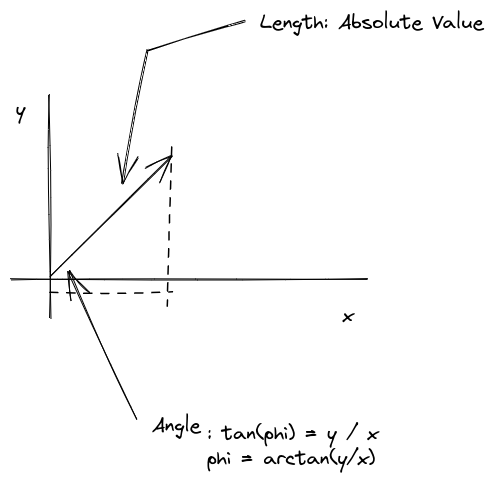

In [ ]:
import math

class Vector2d:
    def __init__(self, x, y):
        self.x = float(x)     # if the wrong data type is passed to the constructor the error is 
        self.y = float(y)     # catched by float which will raise an ValueError

    def __repr__(self):
        name = type(self).__name__
        return f'{name}({self.x}, {self.y})'
        #return f'Vector({self.x}, {self.y})'

    def __str__(self):
        return str((abs(self), self.angle()))
        #return str((self.x, self.y))
        
    def __eq__(self, other):
        return (self.x, self.y) == (other.x, other.y)
        #return self.x == other.x and self.y == other.y 

    def __abs__(self):
        return math.hypot(self.x, self.y)
        #return abs(complex(self.x,self.y))
        #return math.sqrt(self.x ** 2 + self.y ** 2)
    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        #rad = math.atan(self.y/self.x)
        rad = math.atan2(self.y, self.x)
        return math.degrees(rad)


In [ ]:
v1 = Vector2d(1,2) 
v2 = Vector2d(1,2) 
v3 = Vector2d(1,1)
v4 = Vector2d(3,4)
v1 # Vector(1, 2)
print(v1) # Vector(1, 2)
v1 # Vector(1, 2)

v3.angle()

(2.23606797749979, 63.43494882292201)


45.0

In [ ]:
v1 == v2
v1 == v3
abs(v4)
print(abs(1+1J))
print(abs(v3))

1.4142135623730951
1.4142135623730951


In [ ]:
bool(v1)
v5 = Vector2d(0,0)
bool(v5)
bool(0)

False

## A Hashable Vector2d

In [ ]:
hash(v1)

TypeError: unhashable type: 'Vector2d'

be definition to hash a type it needs to be immutable

In [ ]:
v1 = Vector2d(1,1)
v1.x = 2
v1

Vector2d(2, 1.0)

In [ ]:
import math

class Vector2d:
    def __init__(self, x, y):
        self.__x = float(x)     # if the wrong data type is passed to the constructor the error is 
        self.__y = float(y)     # catched by float which will raise an ValueError

    @property
    def x(self):
        return self.__x

    @property
    def y(self):
        return self.__y

    def __repr__(self):
        name = type(self).__name__
        return f'{name}({self.x}, {self.y})'

    def __str__(self):
        return str((abs(self), self.angle()))
        #return str((self.x, self.y))
        
    def __eq__(self, other):
        return (self.x, self.y) == (other.x, other.y)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        rad = math.atan2(self.y, self.x)
        return math.degrees(rad)

    def __hash__(self):
        return hash((self.x, self.y))

In [ ]:
v1 = Vector2d(1,1)

#v1._Vector2d__x = 2 # By convention you should not set a
# an private/public attribute outside a class 
print(v1)

(1.4142135623730951, 45.0)


In [ ]:
v2 = Vector2d(1.2,1)
v3 = Vector2d(1, 1)

print(hash(v1))
print(hash(v3))
hash(v2)

8389048192121911274
8389048192121911274


3958399589457684068

You should only implement these special methods if your application needs them. End users don't care if the objects that make up an application are "Pythonic" or not.

## Vector2d to N-dim Vector




In [ ]:
v1 = Vector)

print(v1)
v1 == v1
abs(v1)
bool(v1)

In [ ]:
import reprlib

class Vector:
    def __init__(self, components):
        self._components = [*components]

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):
        components = reprlib.repr([self._components])
        return f"Vector({components})"
        return 'BLA'
        
    def __str__(self):
        return str(tuple(self._components))

    def __eq__(self, other):
        return tuple(self._components) == tuple(other._components)

    def __abs__(self):
        return math.hypot(*self._components)

    def __bool__(self):
        return bool(abs(self))

    def __len__(self):
        return len(self._components)

    def __getitem__(self, index):
        return self._components[index]
        




In [ ]:
v1 = Vector([1,0,0])

# for element in v1:
#     print(element)

bool(v1)
len(v1)

print(v1[2])

0


In [ ]:
iterator = iter([1,2,3])
next(iterator)
next(iterator)
next(iterator)
next(iterator)


StopIteration: 

In [ ]:
import reprlib

reprlib.repr([1,2,3,4,5,6,7,8])

'[1, 2, 3, 4, 5, 6, ...]'

# Operator Overloading

Following equation can be written in Python:

x = y * ((rate +1) ** n)

instead:

x = y.multiply(rate.add(1) ** n)

a + b : you have two operands( a and b) and one operator (+)

- Operators that appear between operands are *infix* operators
- in python, the infix operator can handle any arbitrary type

infix operators make formulars more readable.

- operator overloading is necessary to support infix operator notation withe user-defined types
- having operator overloading in a easy-to-use language was probably a key reason for python's huge success in data science and scientific applications

Other operators:

- function invocation operator()
- attribute access operator .
- item access/slicing operator []

In [ ]:
#Unary Operators
class Vector:
    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):
        return str(tuple(self))


    def __neg__(self):
        return Vector(-x for x in self)

    def __pos__(self):
        return Vector(self)


# Overloading + for Vector Addition

```
v1 = Vector([3,4,5])
v2 = Vector([6,7,8])

v1 + v2 # Vector([3+6, 4+7,5+8]) = Vector([9, 11, 13])

In [94]:
import itertools

class Vector:
    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):
        # print('component', self._components)
        # print('comp', [str(num) for num in self._components])
        return f"Vector({' '.join([str(num) for num in self._components])})"

    def __add__(self,other):
        pairs = itertools.zip_longest(self, other, fillvalue=0)
        # pairs = zip(self, other, strict=True)
        #print(list(pairs))
        return Vector([i + j for i,j in pairs])

In [95]:
v1 = Vector([3,4,5])
v2 = Vector([6,7,8, 9])
(v1 + v2)

Vector(9 11 13 9)

In [98]:
v1 + [1,2,33]

(1,2,3) + v1

TypeError: can only concatenate tuple (not "Vector") to tuple

We can fix mixed-typed additions by making use by Python dispatching mechanism for the infix operator special methods:
1. If a has __ add__ call a.__ add__(b)
2. 2. if a doesn't have __ add__, **or** calling it raises an Error, check if b has __ radd__, then call b.__ radd__(a)  (is as a fallback)
3. otherwise raise TypeError: *unsupported operand* type message


In [101]:
import itertools

class Vector:
    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):
        # print('component', self._components)
        # print('comp', [str(num) for num in self._components])
        return f"Vector({' '.join([str(num) for num in self._components])})"

    def __add__(self,other):
        pairs = itertools.zip_longest(self, other, fillvalue=0)
        # pairs = zip(self, other, strict=True)
        #print(list(pairs))
        return Vector([i + j for i,j in pairs])

    def __radd__(self, other):
        print('TRIGGERED')
        return self + other


In [102]:
v1 = Vector([3,4,5])

(1,2,3) + v1

TRIGGERED


Vector(4 6 8)

## Overloading * for Scalar Multiplication

 $x \cdot \begin{pmatrix} a \\ b \\ c \end{pmatrix} = \begin{pmatrix} x \cdot a \\ x \cdot b \\ x \cdot c  \end{pmatrix}$

In [115]:
class Vector:
    def __init__(self, components):   
        self._components = components

    def __iter__(self):
        return iter(self._components)

    def __repr__(self):
        # print('component', self._components)
        # print('comp', [str(num) for num in self._components])
        return f"Vector({' '.join([str(num) for num in self._components])})"

    def __mul__(self, scalar):
        print(self)
        print(scalar)
        return Vector([scalar * i for i in self])

    def __rmul__(self, scalar):
        return  self * scalar


In [116]:
v1 = Vector([1,2,3])

v1 * 2

2 * v1

Vector(1 2 3)
2


RecursionError: maximum recursion depth exceeded